## Car Fuel Consumption

In [53]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

### Cleaning and merging datasets

In [54]:
#call the data:

fuel_data_csv = pd.read_csv('/Users/basakbuluttekin/Desktop/Tech Challenge/archive-2/measurements.csv', sep=',')
fuel_data_excel = pd.read_excel('/Users/basakbuluttekin/Desktop/Tech Challenge/archive-2/measurements2.xlsx')

In [55]:
fuel_data_csv.head(3)

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [56]:
fuel_data_excel.head(3)

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN


In [57]:
print(len(fuel_data_excel))
print(len(fuel_data_csv))

388
388


In [58]:
fuel_data_csv.dtypes

distance         object
consume          object
speed             int64
temp_inside      object
temp_outside      int64
specials         object
gas_type         object
AC                int64
rain              int64
sun               int64
refill liters    object
refill gas       object
dtype: object

In [59]:
fuel_data_excel.dtypes

distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside       int64
specials          object
gas_type          object
AC                 int64
rain               int64
sun                int64
refill liters    float64
refill gas        object
dtype: object

In [60]:
#change the datatype before merging the datasets
objects_to_float = ['distance', 'consume', 'temp_inside', 'refill liters']
for col in objects_to_float:
    fuel_data_csv[col] = fuel_data_csv[col].str.replace(',', '.').astype(float)

In [61]:
#merging the datasets to check duplicates:
data_fuel = pd.concat([fuel_data_csv, fuel_data_excel], axis = 0)
data_fuel.shape

(776, 12)

In [62]:
#drop duplicates:
clean_data = data_fuel.drop_duplicates()


In [63]:
clean_data.isna().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

In [64]:
# checking the 'specials' column to decide drop or not:
clean_data['specials'].value_counts()

specials
rain                  32
sun                   27
AC rain                9
ac                     8
AC                     6
snow                   3
sun ac                 3
AC snow                1
half rain half sun     1
AC sun                 1
AC Sun                 1
ac rain                1
Name: count, dtype: int64

In [65]:
# more than 95% of the "refill liters" and "refill gass" have null values so better to drop:
# not possible to guess null values of 'specials' also more than 75% are empty so better to drop too.
clean_data = clean_data.drop(columns = ['refill gas', 'refill liters', 'specials'])

In [66]:
# checking the numerical data statistics to fill null values in 'temp_inside' column:

clean_data.describe()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun
count,388.000000,388.000000,388.000000,376.000000,388.000000,388.000000,388.000000,388.000000
mean,19.652835,4.912371,41.927835,21.929521,11.358247,0.077320,0.123711,0.082474
std,22.667837,1.033172,13.598524,1.010455,6.991542,0.267443,0.329677,0.275441
min,1.300000,3.300000,14.000000,19.000000,-5.000000,0.000000,0.000000,0.000000
25%,11.800000,4.300000,32.750000,21.500000,7.000000,0.000000,0.000000,0.000000
50%,14.600000,4.700000,40.500000,22.000000,10.000000,0.000000,0.000000,0.000000
75%,19.000000,5.300000,50.000000,22.500000,16.000000,0.000000,0.000000,0.000000
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000


In [67]:
# only 12 null values in 'temp_inside' column, prefer to use mean value of the dataset because range of
# min and max values arent't very large: 
mean = clean_data['temp_inside'].mean()
clean_data['temp_inside'].fillna(value=mean, inplace=True)

In [68]:
#checking null values again before going to EDA:
clean_data.isna().sum()

distance        0
consume         0
speed           0
temp_inside     0
temp_outside    0
gas_type        0
AC              0
rain            0
sun             0
dtype: int64

### Assumptions in dataset:
- temperature unit is assumed as "degree celcius" ==> "C"
- distance unit is assumed as "kilometer" ==> "km"
- speed unit is assumed as "kilometer/hour" ==> "km/h"
- consume unit is assumed as liter/100km ==> "l"

### Adding new column(s)

In [69]:
# total travel time in hours because speed is km/h.
clean_data['travel_time'] = clean_data['distance']/clean_data['speed']

In [70]:
#total fuel consumption for each trip:
clean_data['fuel_consumption'] = (clean_data['consume']* clean_data['distance'])/100

In [71]:
clean_data['gas_type'].value_counts()

gas_type
SP98    228
E10     160
Name: count, dtype: int64

In [72]:
# cost performance calculation: SP98 = 1.93 euros/liter, E10 = 1.86 euros/liter
clean_data['cost_of_trip'] = np.where(clean_data.gas_type == "SP98", clean_data.fuel_consumption * 1.93, clean_data.fuel_consumption * 1.86)

In [73]:
clean_data

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,travel_time,fuel_consumption,cost_of_trip
0,28.0,5.0,26,21.5,12,E10,0,0,0,1.076923,1.4000,2.604000
1,12.0,4.2,30,21.5,13,E10,0,0,0,0.400000,0.5040,0.937440
2,11.2,5.5,38,21.5,15,E10,0,0,0,0.294737,0.6160,1.145760
3,12.9,3.9,36,21.5,14,E10,0,0,0,0.358333,0.5031,0.935766
4,18.5,4.5,46,21.5,15,E10,0,0,0,0.402174,0.8325,1.548450
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0,0,0,0.410256,0.5920,1.142560
384,16.1,4.3,38,25.0,31,SP98,1,0,0,0.423684,0.6923,1.336139
385,16.0,3.8,45,25.0,19,SP98,0,0,0,0.355556,0.6080,1.173440
386,15.4,4.6,42,25.0,31,SP98,1,0,0,0.366667,0.7084,1.367212


In [74]:
#save clean data as a csv file:
clean_data.to_csv('clean_fuel_data.csv')

### EDA - Visualization

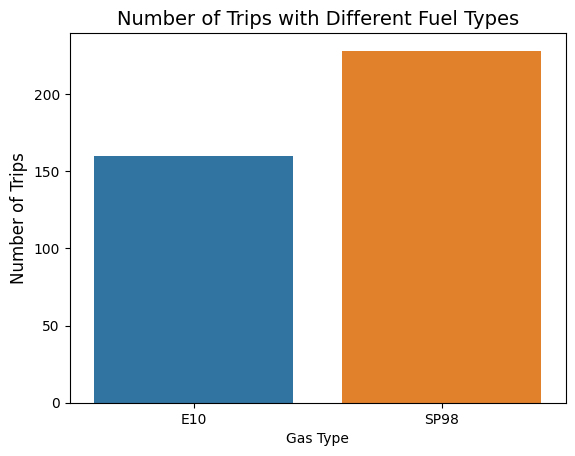

In [75]:
# checking the number of trips for each gas type: 
sns.countplot(x=clean_data['gas_type'])
plt.title('Number of Trips with Different Fuel Types', fontsize = 14)
plt.ylabel('Number of Trips', fontsize = 12)
plt.xlabel('Gas Type');


<Figure size 1000x600 with 0 Axes>

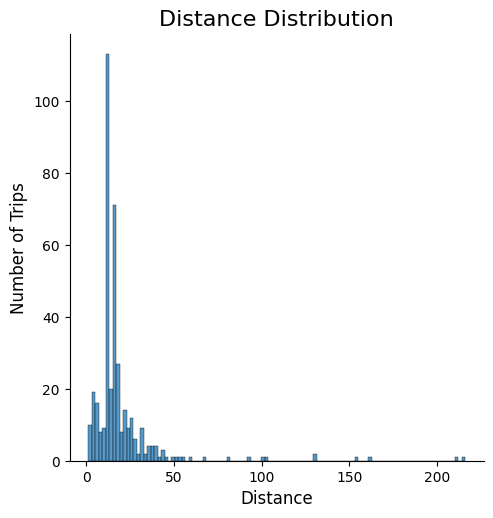

In [76]:
plt.figure(figsize=(10,6));
sns.displot(clean_data['distance'])
plt.title('Distance Distribution', fontsize = 16)
plt.ylabel('Number of Trips', fontsize = 12)
plt.xlabel('Distance', fontsize= 12)
plt.show;

<Figure size 1000x600 with 0 Axes>

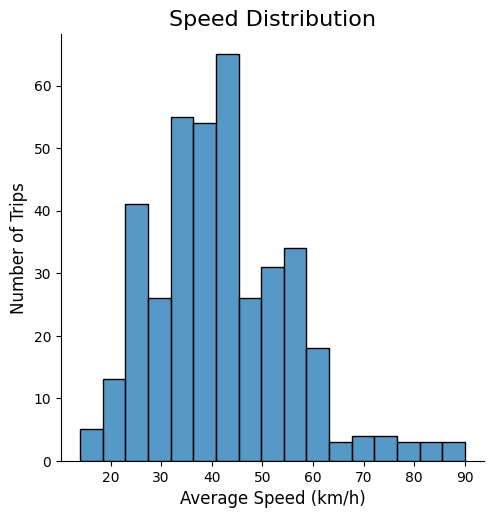

In [77]:
plt.figure(figsize=(10,6));
sns.displot(clean_data['speed'])
plt.title('Speed Distribution', fontsize = 16)
plt.ylabel('Number of Trips', fontsize = 12)
plt.xlabel('Average Speed (km/h)', fontsize= 12)
plt.show;

<Figure size 1000x600 with 0 Axes>

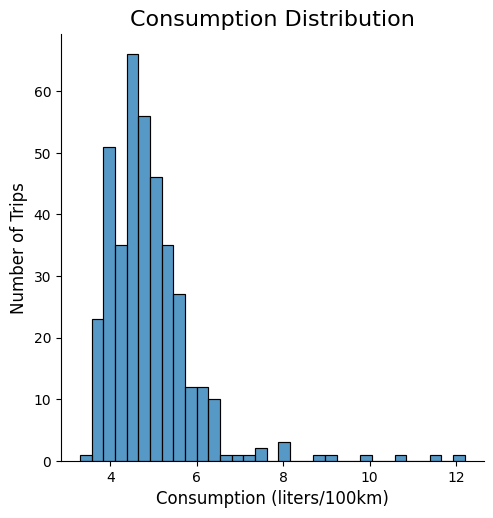

In [78]:
plt.figure(figsize=(10,6));
sns.displot(clean_data['consume'])
plt.title('Consumption Distribution', fontsize = 16)
plt.ylabel('Number of Trips', fontsize = 12)
plt.xlabel('Consumption (liters/100km)', fontsize= 12)
plt.show;

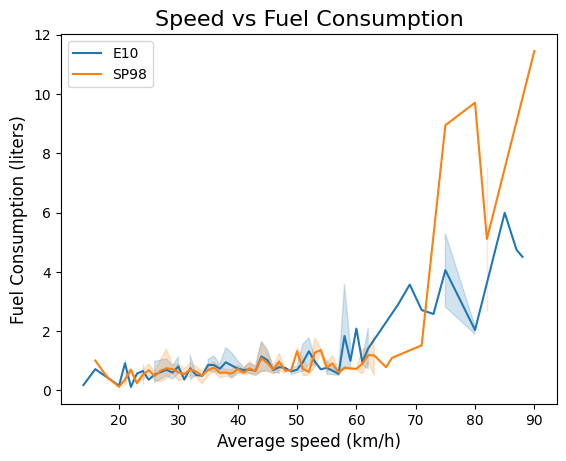

In [79]:
gas_type1 = clean_data[clean_data['gas_type'] == "E10"]
gas_type2 = clean_data[clean_data['gas_type'] == "SP98"]

fig, ax = plt.subplots()
ax1 = sns.lineplot(x="speed", y="fuel_consumption", data=gas_type1, label = "E10" )
ax2 = sns.lineplot(x="speed", y="fuel_consumption", data=gas_type2, label = "SP98" )
plt.title('Speed vs Fuel Consumption', fontsize = 16)
plt.ylabel('Fuel Consumption (liters)', fontsize = 12)
plt.xlabel('Average speed (km/h)', fontsize= 12);


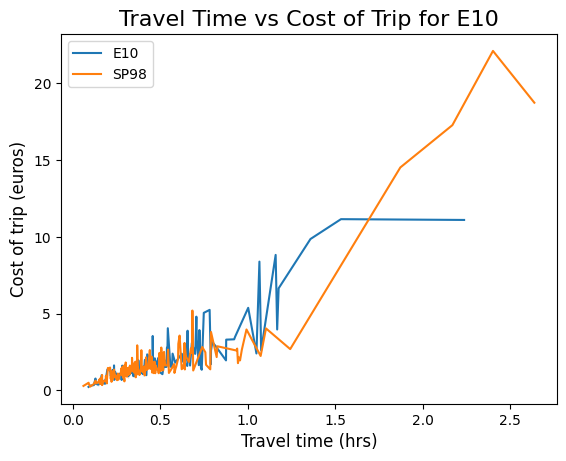

In [80]:

fig, ax = plt.subplots()
ax1 = sns.lineplot(x="travel_time", y="cost_of_trip", data=gas_type1, label = "E10" )
ax2 = sns.lineplot(x="travel_time", y="cost_of_trip", data=gas_type2, label = "SP98" )
plt.title('Travel Time vs Cost of Trip for E10', fontsize = 16)
plt.ylabel('Cost of trip (euros)', fontsize = 12)
plt.xlabel('Travel time (hrs)', fontsize= 12);

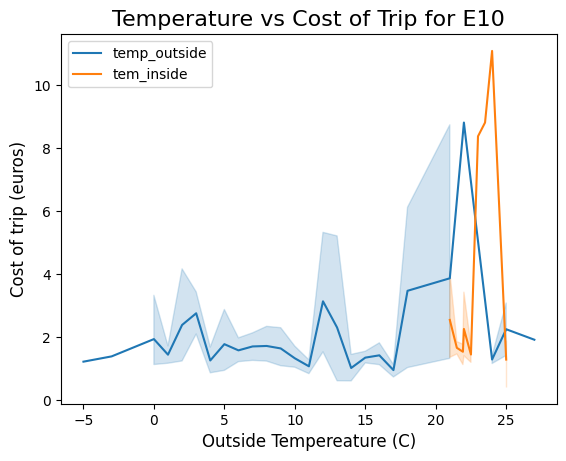

In [81]:
fig, ax = plt.subplots()
ax1 = sns.lineplot(x="temp_outside", y="cost_of_trip", data=gas_type1, label = "temp_outside" )
ax2 = sns.lineplot(x="temp_inside", y="cost_of_trip", data=gas_type1, label = "tem_inside" )
plt.title('Temperature vs Cost of Trip for E10', fontsize = 16)
plt.ylabel('Cost of trip (euros)', fontsize = 12)
plt.xlabel('Outside Tempereature (C)', fontsize= 12);

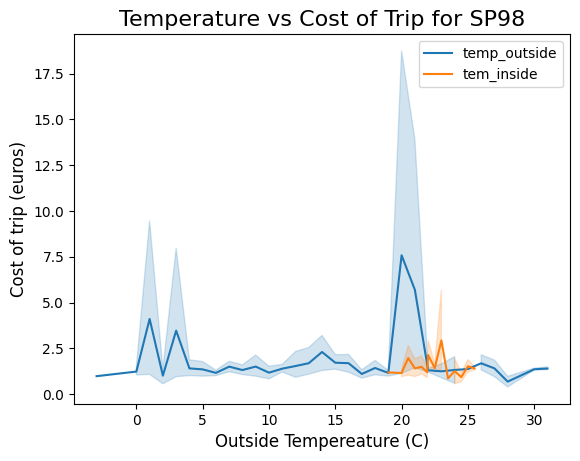

In [82]:
fig, ax = plt.subplots()
ax1 = sns.lineplot(x="temp_outside", y="cost_of_trip", data=gas_type2, label = "temp_outside" )
ax2 = sns.lineplot(x="temp_inside", y="cost_of_trip", data=gas_type2, label = "tem_inside" )
plt.title('Temperature vs Cost of Trip for SP98', fontsize = 16)
plt.ylabel('Cost of trip (euros)', fontsize = 12)
plt.xlabel('Outside Tempereature (C)', fontsize= 12);

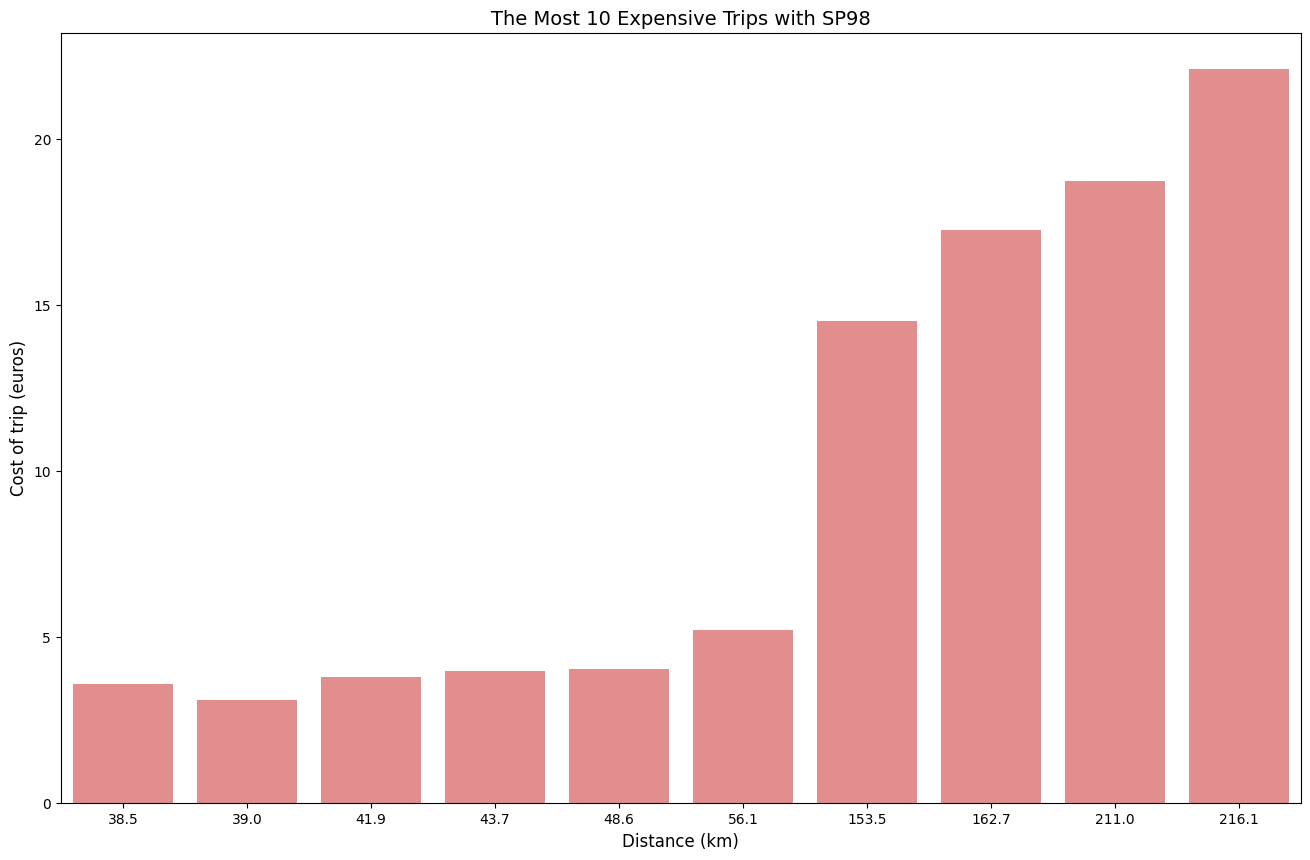

In [83]:
gas_type2 = gas_type2.sort_values(by= 'cost_of_trip',ascending=False)

plt.figure(figsize=(16,10))
sns.barplot(x="distance", y="cost_of_trip", data=gas_type2[:10],
            label="Total", color="lightcoral")
plt.title('The Most 10 Expensive Trips with SP98', fontsize = 14)
plt.xlabel('Distance (km)', fontsize = 12)
plt.ylabel('Cost of trip (euros)', fontsize = 12)
plt.show();

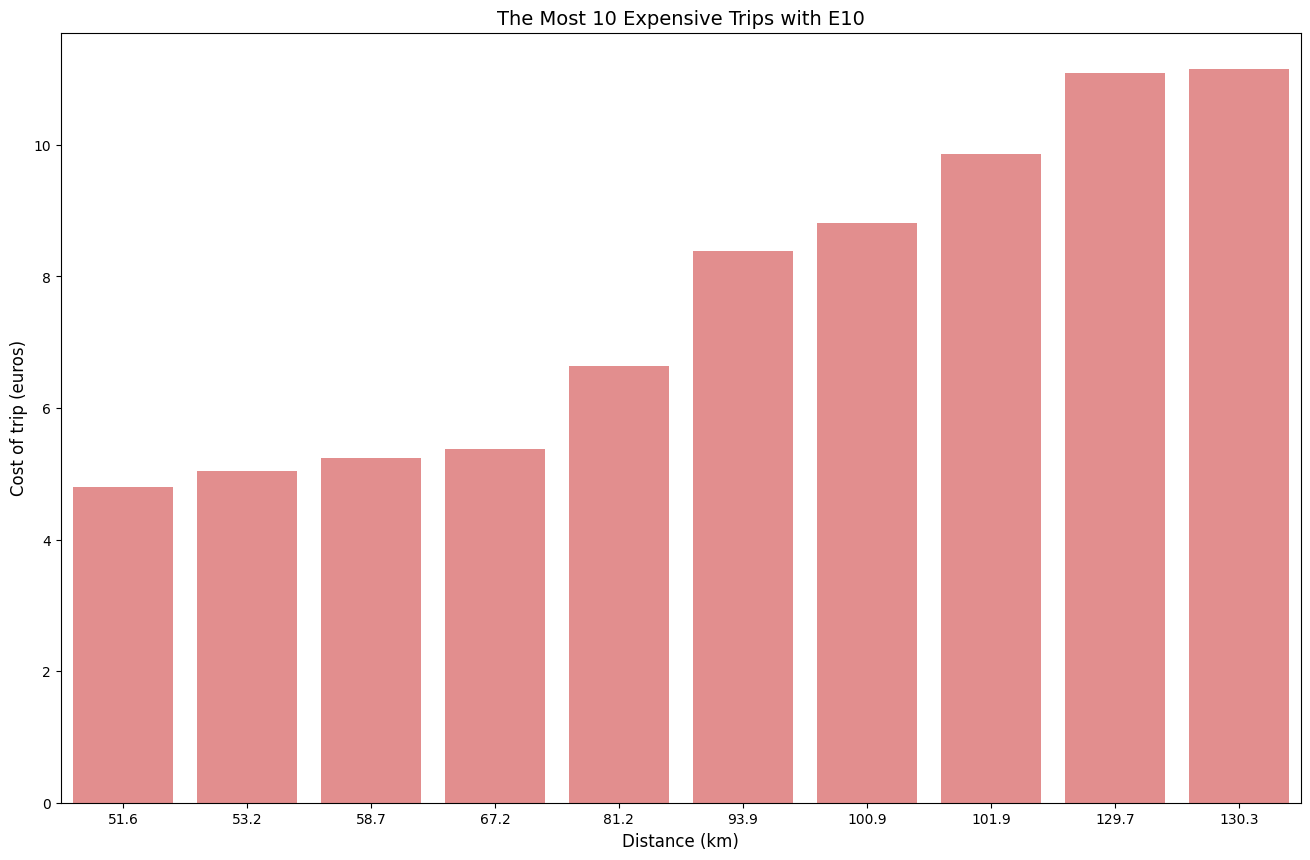

In [84]:
gas_type1 = gas_type1.sort_values(by= 'cost_of_trip',ascending=False)

plt.figure(figsize=(16,10))
sns.barplot(x="distance", y="cost_of_trip", data=gas_type1[:10],
            label="Total", color="lightcoral")
plt.title('The Most 10 Expensive Trips with E10', fontsize = 14)
plt.xlabel('Distance (km)', fontsize = 12)
plt.ylabel('Cost of trip (euros)', fontsize = 12)
plt.show();

In [85]:
# summary table for the most expensive trips:
summary = clean_data.groupby(['gas_type','distance','speed', 'consume', 'temp_inside', 'temp_outside'])['cost_of_trip'].agg(
    ['count','min','max','mean']).sort_values(by = 'max',ascending = False)[:20]
summary.reset_index(inplace = True)
summary.style.highlight_max(color='red')

,gas_type,distance,speed,consume,temp_inside,temp_outside,count,min,max,mean
0,SP98,216.100000,90,5.300000,22.000000,21,1,22.104869,22.104869,22.104869
1,SP98,211.000000,80,4.600000,22.000000,20,1,18.732580,18.732580,18.732580
2,SP98,162.700000,75,5.500000,23.000000,1,1,17.270605,17.270605,17.270605
3,SP98,153.500000,82,4.900000,21.500000,3,1,14.516495,14.516495,14.516495
4,E10,130.300000,85,4.600000,22.000000,12,1,11.148468,11.148468,11.148468
5,E10,129.700000,58,4.600000,24.000000,21,1,11.097132,11.097132,11.097132
6,E10,101.900000,75,5.200000,22.000000,18,1,9.855768,9.855768,9.855768
7,E10,100.900000,87,4.700000,23.500000,22,1,8.820678,8.820678,8.820678
8,E10,93.900000,88,4.800000,23.000000,18,1,8.383392,8.383392,8.383392
9,E10,81.200000,69,4.400000,22.000000,13,1,6.645408,6.645408,6.645408


In [86]:
# summary table for the least expensive trips:
summary = clean_data.groupby(['gas_type','distance','speed', 'consume', 'temp_inside', 'temp_outside'])['cost_of_trip'].agg(
    ['count','min','max','mean']).sort_values(by = 'min',ascending = True)[:20]
summary.reset_index(inplace = True)
summary.style.highlight_max(color='red')

,gas_type,distance,speed,consume,temp_inside,temp_outside,count,min,max,mean
0,E10,2.000000,22,6.000000,22.500000,14,1,0.223200,0.223200,0.223200
1,SP98,2.000000,20,6.200000,21.500000,10,1,0.239320,0.239320,0.239320
2,SP98,1.300000,21,11.500000,20.000000,10,1,0.288535,0.288535,0.288535
3,E10,2.000000,20,8.100000,22.500000,14,1,0.301320,0.301320,0.301320
4,E10,4.200000,29,3.900000,22.000000,18,1,0.304668,0.304668,0.304668
5,E10,1.700000,14,10.800000,21.500000,10,1,0.341496,0.341496,0.341496
6,SP98,5.400000,32,3.300000,21.500000,7,1,0.343926,0.343926,0.343926
7,SP98,2.000000,21,9.900000,21.500000,4,1,0.382140,0.382140,0.382140
8,SP98,5.500000,33,3.700000,24.500000,28,1,0.392755,0.392755,0.392755
9,E10,4.100000,24,5.400000,22.500000,13,1,0.411804,0.411804,0.411804


### Statistics & Predictions

In [87]:
from scipy import stats

stat, pval = stats.ttest_ind(clean_data[clean_data.gas_type == 'E10']. fuel_consumption, clean_data[clean_data.gas_type == 'SP98']. fuel_consumption)
print(stat, pval)

1.089091767035112 0.27679289437741406


##### p-value is higher than O.O5 so we can accept the hypothesis which claims that both fuel type used equally. 

In [88]:
stat, pval = stats.ttest_ind(clean_data[clean_data.gas_type == 'E10']. speed, clean_data[clean_data.gas_type == 'SP98']. speed)
print(stat, pval)

1.9219593333421923 0.055346717706321144


##### p-value is higher than O.O5 so we can accept the hypothesis which claims that speed distribution is same for both fuel types. 

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    precision_recall_curve, roc_curve, roc_auc_score
    
)
from sklearn.utils.class_weight import compute_sample_weight


In [90]:
clean_data

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,travel_time,fuel_consumption,cost_of_trip
0,28.0,5.0,26,21.5,12,E10,0,0,0,1.076923,1.4000,2.604000
1,12.0,4.2,30,21.5,13,E10,0,0,0,0.400000,0.5040,0.937440
2,11.2,5.5,38,21.5,15,E10,0,0,0,0.294737,0.6160,1.145760
3,12.9,3.9,36,21.5,14,E10,0,0,0,0.358333,0.5031,0.935766
4,18.5,4.5,46,21.5,15,E10,0,0,0,0.402174,0.8325,1.548450
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0,0,0,0.410256,0.5920,1.142560
384,16.1,4.3,38,25.0,31,SP98,1,0,0,0.423684,0.6923,1.336139
385,16.0,3.8,45,25.0,19,SP98,0,0,0,0.355556,0.6080,1.173440
386,15.4,4.6,42,25.0,31,SP98,1,0,0,0.366667,0.7084,1.367212


In [91]:
clean_data = clean_data.drop(columns = ['fuel_consumption', 'cost_of_trip'])

In [92]:
# predicting cost_of_trip:
y = clean_data['travel_time']
X = clean_data.drop(columns = 'travel_time', axis = 1)

In [93]:
# Splitting data:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [94]:
X_train_numerical = X_train.select_dtypes(np.number)
X_test_numerical = X_test.select_dtypes(np.number)

In [95]:
# Scaling the data:
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train_numerical)
X_test_norm = scaler.transform(X_test_numerical)

In [96]:
# encoding categorical data
X_train_cat = X_train.select_dtypes (object)
X_train_cat ['gas_type']=np.where(X_train_cat ['gas_type']=='E10', 1, 0)


In [97]:
X_test_cat = X_test.select_dtypes (object)
X_test_cat ['gas_type']=np.where(X_test_cat ['gas_type']=='E10', 1, 0)

In [98]:
X_train = pd.concat([X_train_numerical, X_train_cat],axis = 1)
X_test = pd.concat ([X_test_numerical, X_test_cat],axis = 1)


In [99]:
X_train

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,gas_type
185,51.6,5.0,73,22.5,12,0,0,0,1
259,14.0,5.0,41,22.5,8,0,0,0,1
88,12.9,5.1,32,20.0,11,0,0,0,0
248,12.3,5.2,57,22.5,15,0,0,1,1
12,12.3,5.9,59,21.5,10,0,0,0,1
...,...,...,...,...,...,...,...,...,...
73,9.7,3.9,42,21.5,8,0,0,0,0
118,12.4,4.6,38,23.0,1,0,1,0,0
189,130.3,4.6,85,22.0,12,0,0,0,1
206,2.4,9.0,26,20.0,10,0,0,0,0


In [100]:
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

In [101]:
print('Test_score:' , lm.score(X_test, y_test))
print('Train_score:' , lm.score(X_train, y_train))


Test_score: 0.9117526062654915
Train_score: 0.8834167452639803


In [102]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [103]:
print('Test_score:' , model.score(X_test, y_test))
print('Train_score:' , model.score(X_train, y_train))

Test_score: 0.9265878363182456
Train_score: 0.9548817730390564


#### KneighborsRegressor will be better model to predict travel time. 

### Conclusions

#### Driver had more trip with SP98 fuel than E10 fuel. 
#### Distance of the most of the trips are between 10-50km, they can be called relatively short distance.
#### Most of the time average speed of the driver is between 35km/h and 45 km/h.
#### Fuel consumption of SP98 is higher than E10 when the average speed is more than 60 km/h. Also fuel consumption increases drastically after 60 km/h for both fuel type.
#### In winter time the fuel consumption is higher because of AC usage. 
#### The longest  and the most expensive 3 trips were taken with SP98.
#### The shortest and the least expensive 3 trips were taken with SP98 too. 
#### The longest trip was 216 km and average speed was 90 km/h.
#### The shortest trip was 4.5 km and average speed was 23 km/h.
#### The consumption is mostly between 4-6 liters/100km.
#### The highest consumtion is 11 liters/km while outside temperature was around 10C.